### Goal
- measure the intersection of long reads derived models with the nets alignmens
- long read derived models were generated with Lyric and IsoQuant and subsequently filtered using SQANTI
- the IsoQuant models were generated in reference free mode

# Material

In [3]:
# chains were downloaded from ucsc, converted from bigBed to bed, and only the first three columns kept, and merged to avoid overlaps
! ls ../data/bb_net/

00_dw_nets.sh
01_covert_bb_to_bed.sh
02_merge_overlaps.sh
GCA_963853865.1_ilHelHell1.1.GCA_963855885.1.net.bb
GCA_963853865.1_ilHelHell1.1.GCA_963855885.1.net.bed
GCA_963853865.1_ilHelHell1.1.GCA_963855885.1.net.merged.bed
GCA_963853865.1_ilHelHell1.1.GCA_963855885.1.synNet.bb
GCA_963853865.1_ilHelHell1.1.GCA_963855885.1.synNet.bed
GCA_963853865.1_ilHelHell1.1.GCA_963855885.1.synNet.merged.bed


In [4]:
nets = {
    'net_main' : '../data/bb_net/GCA_963853865.1_ilHelHell1.1.GCA_963855885.1.net.merged.bed',
    'net_syn' : '../data/bb_net/GCA_963853865.1_ilHelHell1.1.GCA_963855885.1.synNet.merged.bed'  
}

#### Convert gtf to genepred

Models were downloaded fromt the cluster `/users/rg/fzanarello/projects/SQANTI/analyses/Lycaena_helle/*/*/filter`. The files were converted from gff to gtf using: `docker run --platform linux/amd64 -v $PWD:$PWD -w $PWD quay.io/biocontainers/agat:1.4.0--pl5321hdfd78af_0 agat_convert_sp_gff2gtf.pl --gff input.gff -o output.gtf`

In [10]:
alias = 'https://hgdownload.soe.ucsc.edu/hubs/GCA/963/853/865/GCA_963853865.1/GCA_963853865.1.chromAlias.txt'

gtf_lyric_leg = '../data/longread_models/filtered/Lh_leg_lyric_sqanti_filter_corrected.gtf'
gtf_lyric_wing = '../data/longread_models/filtered/Lh_wing_lyric_sqanti_filter_corrected.gtf'
gtf_isoq_leg = '../data/longread_models/filtered/Lh_leg_iqfree_sqanti_filter_corrected.gtf'
gtf_isoq_wing = '../data/longread_models/filtered/Lh_wing_iqfree_sqanti_filter_corrected.gtf'

gtf_lyric_leg_gbnames = '../data/longread_models/filtered/Lh_leg_lyric_sqanti_filter_corrected.gbnames.gtf'
gtf_lyric_wing_gbnames = '../data/longread_models/filtered/Lh_wing_lyric_sqanti_filter_corrected.gbnames.gtf'
gtf_isoq_leg_gbnames = '../data/longread_models/filtered/Lh_leg_iqfree_sqanti_filter_corrected.gbnames.gtf'
gtf_isoq_wing_gbnames = '../data/longread_models/filtered/Lh_wing_iqfree_sqanti_filter_corrected.gbnames.gtf'

In [11]:
! chromToUcsc -a $alias -i $gtf_lyric_leg  -o $gtf_lyric_leg_gbnames
! chromToUcsc -a $alias -i $gtf_lyric_wing  -o $gtf_lyric_wing_gbnames
! chromToUcsc -a $alias -i $gtf_isoq_leg  -o $gtf_isoq_leg_gbnames
! chromToUcsc -a $alias -i $gtf_isoq_wing  -o $gtf_isoq_wing_gbnames

In [12]:
genepred_lyric_leg_gbnames = '../data/longread_models/filtered/Lh_leg_lyric_sqanti_filter_corrected.gbnames.gp'
genepred_lyric_wing_gbnames = '../data/longread_models/filtered/Lh_wing_lyric_sqanti_filter_corrected.gbnames.gp'
genepred_isoq_leg_gbnames = '../data/longread_models/filtered/Lh_leg_iqfree_sqanti_filter_corrected.gbnames.gp'
genepred_isoq_wing_gbnames = '../data/longread_models/filtered/Lh_wing_iqfree_sqanti_filter_corrected.gbnames.gp'

In [13]:
! gtfToGenePred $gtf_lyric_leg_gbnames $genepred_lyric_leg_gbnames
! gtfToGenePred $gtf_lyric_wing_gbnames $genepred_lyric_wing_gbnames
! gtfToGenePred $gtf_isoq_leg_gbnames $genepred_isoq_leg_gbnames
! gtfToGenePred $gtf_isoq_wing_gbnames $genepred_isoq_wing_gbnames

In [16]:
! ls ../data/longread_models/filtered

Lh_leg_iqfree_sqanti_filter_corrected.gbnames.gp
Lh_leg_iqfree_sqanti_filter_corrected.gbnames.gtf
Lh_leg_iqfree_sqanti_filter_corrected.gtf
Lh_leg_lyric_sqanti_filter_corrected.gbnames.gp
Lh_leg_lyric_sqanti_filter_corrected.gbnames.gtf
Lh_leg_lyric_sqanti_filter_corrected.gtf
Lh_wing_iqfree_sqanti_filter_corrected.gbnames.gp
Lh_wing_iqfree_sqanti_filter_corrected.gbnames.gtf
Lh_wing_iqfree_sqanti_filter_corrected.gtf
Lh_wing_lyric_sqanti_filter_corrected.gbnames.gp
Lh_wing_lyric_sqanti_filter_corrected.gbnames.gtf
Lh_wing_lyric_sqanti_filter_corrected.gtf


In [17]:
anns = {
    'lyric_leg' : '../data/longread_models/filtered/Lh_leg_lyric_sqanti_filter_corrected.gbnames.gp',
    'lyric_wing' : '../data/longread_models/filtered/Lh_wing_lyric_sqanti_filter_corrected.gbnames.gp',
    'isoq_leg' : '../data/longread_models/filtered/Lh_leg_iqfree_sqanti_filter_corrected.gbnames.gp',
    'isoq_wing' : '../data/longread_models/filtered/Lh_wing_iqfree_sqanti_filter_corrected.gbnames.gp'
}

# Net size

In [18]:
import pandas as pd
import pyranges as pr

In [19]:
genome_size = pd.read_csv('https://hgdownload.soe.ucsc.edu/hubs/GCA/963/853/865/GCA_963853865.1/GCA_963853865.1.chrom.sizes.txt', sep = '\t', header = None)
genome_size = genome_size[1].sum()
genome_size

547321747

In [20]:
net_dic = {}

for net in nets:
    gr = pr.read_bed(nets[net])
    total_size = (gr.End - gr.Start).sum()

    net_dic[net] = {'size' : total_size,
                    'genome_perc' : round((total_size*100)/genome_size, 2)}

/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}


In [21]:
net_dic

{'net_main': {'size': 73935348, 'genome_perc': 13.51},
 'net_syn': {'size': 34773926, 'genome_perc': 6.35}}

# Intersection 

In [22]:
! mkdir -p ../results/longread_models_net_intersection

In [23]:
def intersect_bed_gb(bed, gp, res):
    ! overlapSelect -aggregate -statsOutputAll $bed $gp $res

In [24]:
for ann in anns:
    for net in nets:
        out_file = f'../results/longread_models_net_intersection/{ann}_overlap_{net}.stat'
        print (f'Generating {out_file}')
        intersect_bed_gb(nets[net], anns[ann], out_file)
        print ('Done! \n')

Generating ../results/longread_models_net_intersection/lyric_leg_overlap_net_main.stat
Done! 

Generating ../results/longread_models_net_intersection/lyric_leg_overlap_net_syn.stat
Done! 

Generating ../results/longread_models_net_intersection/lyric_wing_overlap_net_main.stat
Done! 

Generating ../results/longread_models_net_intersection/lyric_wing_overlap_net_syn.stat
Done! 

Generating ../results/longread_models_net_intersection/isoq_leg_overlap_net_main.stat
Done! 

Generating ../results/longread_models_net_intersection/isoq_leg_overlap_net_syn.stat
Done! 

Generating ../results/longread_models_net_intersection/isoq_wing_overlap_net_main.stat
Done! 

Generating ../results/longread_models_net_intersection/isoq_wing_overlap_net_syn.stat
Done! 



#### Analysis

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
overlaps = ! ls ../results/longread_models_net_intersection/
overlaps = ['../results/longread_models_net_intersection/'+x for x in overlaps]
overlaps

['../results/longread_models_net_intersection/isoq_leg_overlap_net_main.stat',
 '../results/longread_models_net_intersection/isoq_leg_overlap_net_syn.stat',
 '../results/longread_models_net_intersection/isoq_wing_overlap_net_main.stat',
 '../results/longread_models_net_intersection/isoq_wing_overlap_net_syn.stat',
 '../results/longread_models_net_intersection/lyric_leg_overlap_net_main.stat',
 '../results/longread_models_net_intersection/lyric_leg_overlap_net_syn.stat',
 '../results/longread_models_net_intersection/lyric_wing_overlap_net_main.stat',
 '../results/longread_models_net_intersection/lyric_wing_overlap_net_syn.stat']

In [26]:
lyric_leg_size = pd.read_csv('../results/longread_models_net_intersection/lyric_leg_overlap_net_main.stat', sep = '\t').inBases.sum()
lyric_wing_size = pd.read_csv('../results/longread_models_net_intersection/lyric_wing_overlap_net_main.stat', sep = '\t').inBases.sum()
isoq_leg_size = pd.read_csv('../results/longread_models_net_intersection/isoq_leg_overlap_net_main.stat', sep = '\t').inBases.sum()
isoq_wing_size = pd.read_csv('../results/longread_models_net_intersection/isoq_wing_overlap_net_main.stat', sep = '\t').inBases.sum()

print (lyric_leg_size)
print (lyric_wing_size)
print (isoq_leg_size)
print (isoq_wing_size)

14144522
13045450
9997327
9351775


In [27]:
def get_overlap_size(overlap_stats_path, only_overlapping = False):

    df = pd.read_csv(overlap_stats_path, sep = '\t')

    if only_overlapping:
        df = df[df.inOverBases > 0]
    
    ann_size = df.inBases.sum()
    over_size = df.inOverBases.sum()
    perc_overlap = round((over_size*100)/ann_size, 2)

    return perc_overlap

In [28]:
for o in overlaps:
    p = get_overlap_size(o, only_overlapping = False)
    sample_name = o.split('/')[-1]
    print (f'{sample_name} -> {p}')

isoq_leg_overlap_net_main.stat -> 64.5
isoq_leg_overlap_net_syn.stat -> 60.71
isoq_wing_overlap_net_main.stat -> 62.91
isoq_wing_overlap_net_syn.stat -> 58.62
lyric_leg_overlap_net_main.stat -> 70.11
lyric_leg_overlap_net_syn.stat -> 66.73
lyric_wing_overlap_net_main.stat -> 62.65
lyric_wing_overlap_net_syn.stat -> 58.32


In [29]:
for o in overlaps:
    p = get_overlap_size(o, only_overlapping = True)
    sample_name = o.split('/')[-1]
    print (f'{sample_name} -> {p}')

isoq_leg_overlap_net_main.stat -> 65.96
isoq_leg_overlap_net_syn.stat -> 66.2
isoq_wing_overlap_net_main.stat -> 65.46
isoq_wing_overlap_net_syn.stat -> 65.91
lyric_leg_overlap_net_main.stat -> 72.1
lyric_leg_overlap_net_syn.stat -> 72.68
lyric_wing_overlap_net_main.stat -> 67.0
lyric_wing_overlap_net_syn.stat -> 67.58


In [30]:
overlap_df = pd.DataFrame()

for o in overlaps:
    tmp_df = pd.read_csv(o, sep = '\t')
    sample_name = o.split('/')[-1].strip('.stat')
    tool = sample_name.split('_')[0]
    tissue = sample_name.split('_')[1]
    chain = sample_name.split('_')[-1]
    tmp_df['sample_name'] = sample_name
    tmp_df['tool'] = tool
    tmp_df['tissue'] = tissue
    tmp_df['chain'] = chain
    
    overlap_df = pd.concat([overlap_df, tmp_df])

In [31]:
overlap_df

,#inId,inOverlap,inOverBases,inBases,sample_name,tool,tissue,chain
0,transcript4905.ilHelHell1.1_ChrZ.nnic,0.854,1372,1607,isoq_leg_overlap_net_main,isoq,leg,main
1,transcript4910.ilHelHell1.1_ChrZ.nnic,0.209,319,1524,isoq_leg_overlap_net_main,isoq,leg,main
2,transcript4913.ilHelHell1.1_ChrZ.nnic,0.894,2303,2577,isoq_leg_overlap_net_main,isoq,leg,main
3,transcript4940.ilHelHell1.1_ChrZ.nnic,0.908,4403,4849,isoq_leg_overlap_net_main,isoq,leg,main
4,transcript4943.ilHelHell1.1_ChrZ.nnic,0.926,5371,5803,isoq_leg_overlap_net_main,isoq,leg,main
...,...,...,...,...,...,...,...,...
11366,ont-Crg-xx_Lycaena_0+_Wing.NAM_TM_000001655083,0.307,801,2612,lyric_wing_overlap_net_syn,lyric,wing,syn
11367,ont-Crg-xx_Lycaena_0+_Wing.NAM_TM_000001655094,0.319,801,2511,lyric_wing_overlap_net_syn,lyric,wing,syn
11368,ont-Crg-xx_Lycaena_0+_Wing.NAM_TM_000001655214,0.270,579,2147,lyric_wing_overlap_net_syn,lyric,wing,syn
11369,ont-Crg-xx_Lycaena_0+_Wing.NAM_TM_000001655540,0.378,801,2118,lyric_wing_overlap_net_syn,lyric,wing,syn


Text(0.5, 0.98, '% overlap models/net')

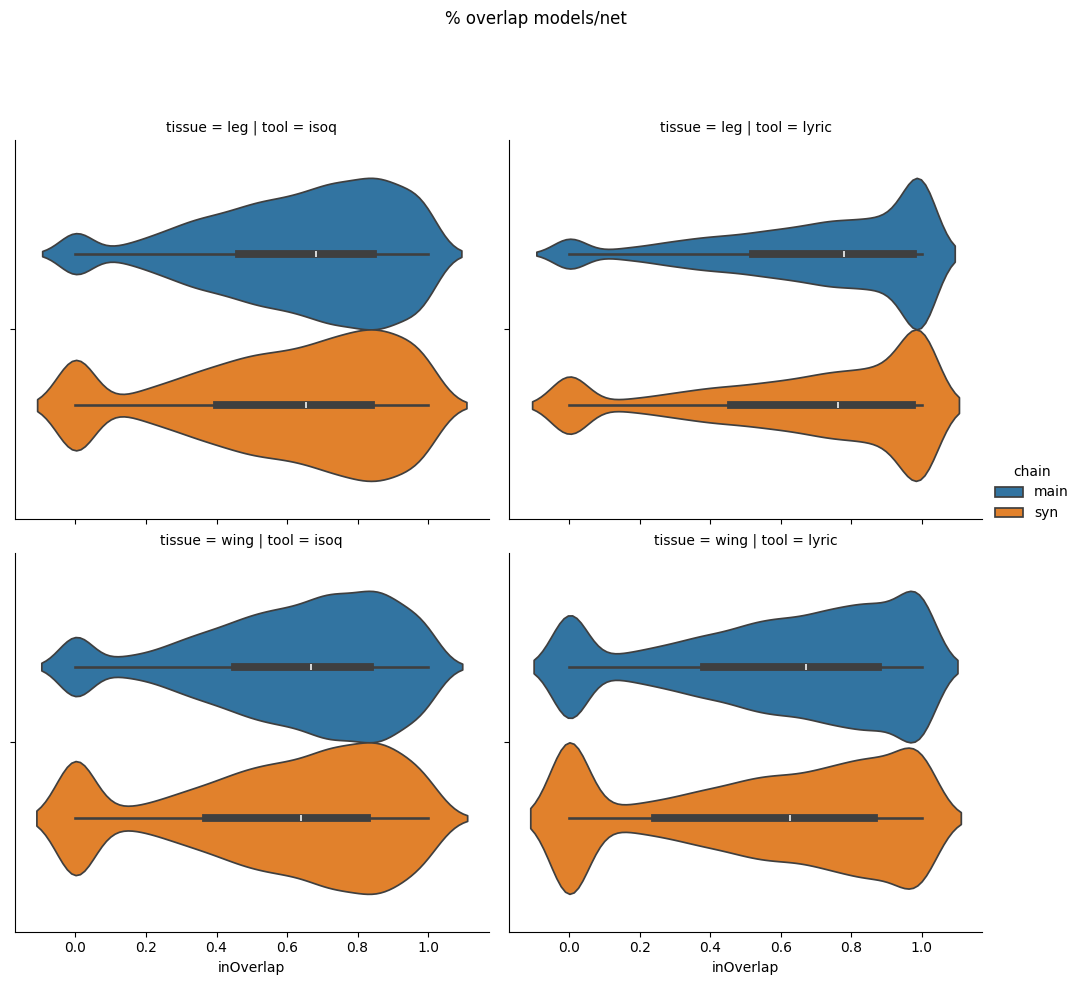

In [35]:
a = sns.catplot(data = overlap_df, x = 'inOverlap',hue = 'chain' ,row = 'tissue',col = 'tool', kind = 'violin')
a.fig.subplots_adjust(top=0.85)
a.fig.suptitle('% overlap models/net')

Text(0.5, 0.98, '% overlap models/net')

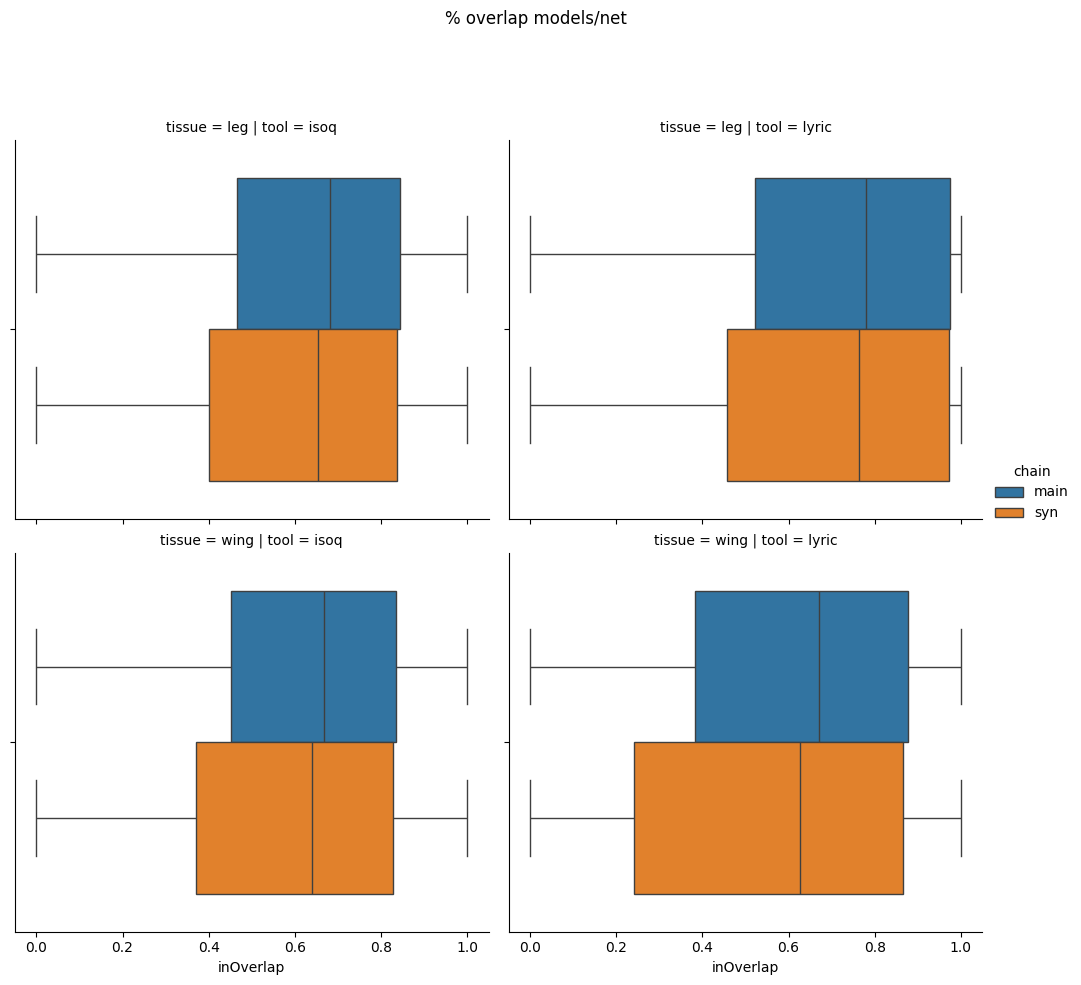

In [36]:
a = sns.catplot(data = overlap_df, x = 'inOverlap',hue = 'chain' ,row = 'tissue',col = 'tool', kind = 'box')
a.fig.subplots_adjust(top=0.85)
a.fig.suptitle('% overlap models/net')

Text(0.5, 0.98, '% overlap models/net excluding zeros')

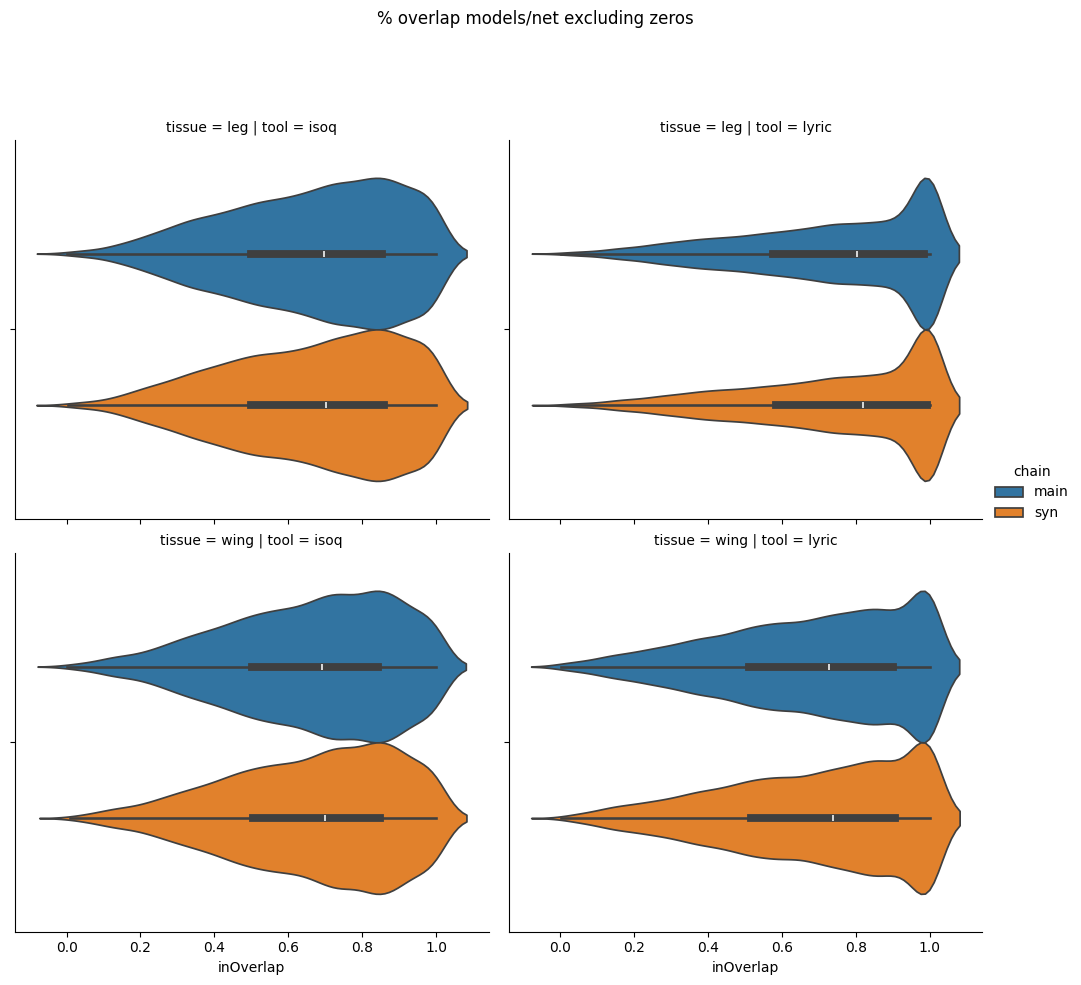

In [38]:
# plt.title('% overlap excluding zeros')
a = sns.catplot(data = overlap_df[overlap_df.inOverlap > 0], x = 'inOverlap',hue = 'chain' ,row = 'tissue',col = 'tool', kind = 'violin')
a.fig.subplots_adjust(top=0.85)
a.fig.suptitle('% overlap models/net excluding zeros')

Text(0.5, 0.98, '% overlap models/net excluding zeros')

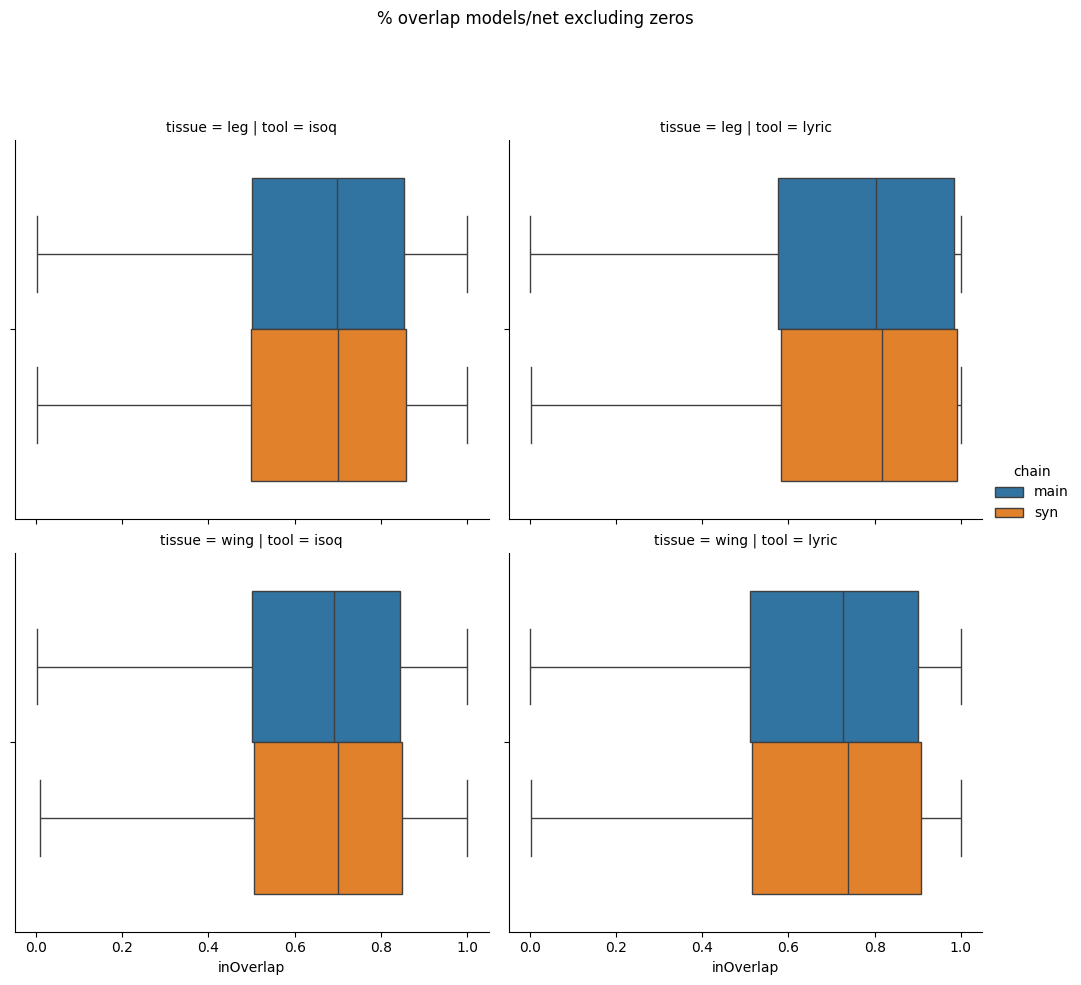

In [37]:
# plt.title('% overlap excluding zeros')
a = sns.catplot(data = overlap_df[overlap_df.inOverlap > 0], x = 'inOverlap',hue = 'chain' ,row = 'tissue',col = 'tool', kind = 'box')
a.fig.subplots_adjust(top=0.85)
a.fig.suptitle('% overlap models/net excluding zeros')